In [10]:
import pandas as pd

df = pd.read_csv("historic.csv",  encoding = "ISO-8859-1",header=None)


,0,1
0,2019-11-17 03:57:34,"RT @GOPLeader: .@RepStefanik: ""I just want to ..."
1,2019-11-17 03:57:31,RT @SayWhenLA: Attorney General Barr and Presi...
2,2019-11-17 03:57:28,RT @charliekirk11: Ambassador Yavonovitch said...
3,2019-11-17 03:57:28,"RT @VertDuFerk: Well, considering people voted..."
4,2019-11-17 03:57:28,RT @Ironhorse76: A wise reminder that this sho...


In [19]:
df_coment=df[1]

In [20]:
df_coment.head()

0    RT @GOPLeader: .@RepStefanik: "I just want to ...
1    RT @SayWhenLA: Attorney General Barr and Presi...
2    RT @charliekirk11: Ambassador Yavonovitch said...
3    RT @VertDuFerk: Well, considering people voted...
4    RT @Ironhorse76: A wise reminder that this sho...
Name: 1, dtype: object

In [25]:
!pip install wordcloud

    100% |████████████████████████████████| 368kB 3.7MB/s ta 0:00:01


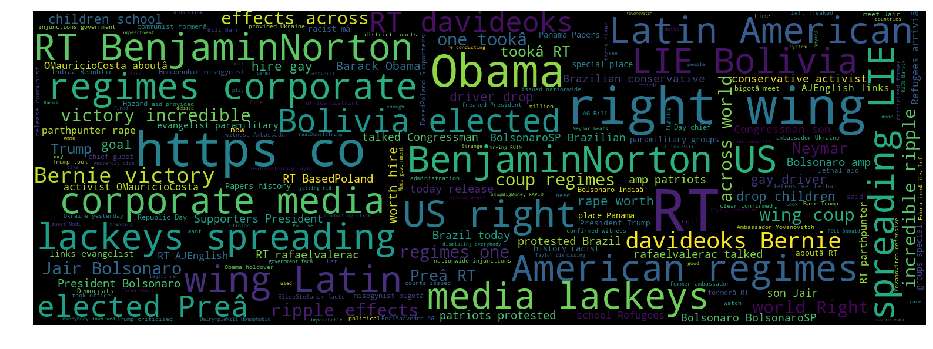

In [30]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = open('historic.csv','r',encoding="latin-1").read()
wordcloud = WordCloud(max_font_size=100,width = 1520, height = 535).generate(text)
plt.figure(figsize=(16,9))
plt.imshow(wordcloud)
plt.axis("off")
#plt.show()
plt.savefig('wordcloud.png')

In [1]:
 with open('subject_list.json', 'r',encoding="latin-1") as tl:
                subject_list = eval(tl.readline())

NameError: name 'mexico' is not defined

In [2]:
text = open('subject_list.json','r',encoding="latin-1").read()

In [3]:
text

'mexico'

In [5]:
print(text)

mexico


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import preprocessor as p
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

import re
import json
import string
from collections import Counter

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
set(stopwords.words('english'))
from nltk.tokenize import word_tokenize
nltk.download('punkt')

pd.options.display.max_colwidth = 1000000

# streaming or historic
data = 'historic'

if data == 'streaming':
    # Recupera as palavras-chave para imprimir na tela
    with open('tracklist.json', 'r') as tl:
        tracklist = eval(tl.readline())

    print('\nLista de palavras-chave rastreadas:')
    print(tracklist)

    # Recupera o arquivo JSON com os tweets rastreados
    tweets_data_path = 'tweets.json'
    tweets_data = []

    tweets_file = open(tweets_data_path, 'r')
    for line in tweets_file:
        try:
            tweet = json.loads(line)
            tweets_data.append(tweet)
        except:
            continue

    # Cria um DataFrame com alguns campos importantes do JSON
    tweets = pd.DataFrame()
    tweets['Username'] = list(map(lambda tweet: tweet['user']['screen_name'], tweets_data))
    tweets['Text'] = list(map(lambda tweet: tweet['text'], tweets_data))
    tweets['Location'] = list(map(lambda tweet: tweet['user']['location'], tweets_data))
    tweets['Timestamp'] = list(map(lambda tweet: tweet['created_at'], tweets_data))
else:
    # Recupera as palavras-chave para imprimir na tela
    #with open('subject_list.json', 'r') as tl:
    #    subject_list = eval(tl.readline())

    #print('\nLista de palavras-chave rastreadas:')
    #print(subject_list)

    # Cria um DataFrame com alguns campos importantes do JSON
    tweets = pd.read_csv('historic.csv', header=None, names=['Timestamp', 'Text'])

print('\nTweets Dataframe')
print(tweets)

# Início do processo de limpeza dos tweets
# Passo 1: Utilizando a biblioteca "Preprocessor"
clean_tweets1 = []
for tweet in tweets['Text']:
    clean = p.clean(tweet)
    clean_tweets1.append(clean)

# Passo 2: Utilizando a biblioteca "NLTK" para processamento de linguagem natural
# Lista de emoticons a ser retirados dos tweets
emoji_pattern = re.compile("["
         u"\U0001F600-\U0001F64F"  # emoticons
         u"\U0001F300-\U0001F5FF"  # symbols & pictographs
         u"\U0001F680-\U0001F6FF"  # transport & map symbols
         u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
         u"\U00002702-\U000027B0"
         u"\U000024C2-\U0001F251"
         "]+", flags=re.UNICODE)

# Happy Emoticons
emoticons_happy = set([
    ':-)', ':)', ';)', ':o)', ':]', ':3', ':c)', ':>', '=]', '8)', '=)', ':}',
    ':^)', ':-D', ':D', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D', '=D',
    '=-3', '=3', ':-))', ":'-)", ":')", ':*', ':^*', '>:P', ':-P', ':P', 'X-P',
    'x-p', 'xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', '>:)', '>;)', '>:-)',
    '<3'
    ])

# Sad Emoticons
emoticons_sad = set([
    ':L', ':-/', '>:/', ':S', '>:[', ':@', ':-(', ':[', ':-||', '=L', ':<',
    ':-[', ':-<', '=\\', '=/', '>:(', ':(', '>.<', ":'-(", ":'(", ':\\', ':-c',
    ':c', ':{', '>:\\', ';('
    ])

# Combinando os emoticons
emoticons = emoticons_happy.union(emoticons_sad)

# Função que faz a limpeza nos tweets utilizando "NLTK" e processamento de linguagem natural
def clean_tweets(tweet):
 
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(tweet)
    # Removendo menções
    tweet = re.sub(r':', '', tweet)
    tweet = re.sub(r'‚Ä¶', '', tweet)
    # Substituindo caracteres non-ASCII com espaços
    tweet = re.sub(r'[^\x00-\x7F]+',' ', tweet)
    # Removendo os emojis
    tweet = emoji_pattern.sub(r'', tweet)
    # Filtro usando a biblioteca NLTK
    filtered_tweet = [w for w in word_tokens if not w in stop_words]
    filtered_tweet = []
    for w in word_tokens:
    # Checando tokens em relação às stop words, emoticons e pontuações
        if w not in stop_words and w not in emoticons and w not in string.punctuation:
            filtered_tweet.append(w)

    return ' '.join(filtered_tweet)

# Gerando uma lista com todos os tweets já limpos
ready_tweets = []
for i in range(len(clean_tweets1)):
    ready_tweets.append(clean_tweets(clean_tweets1[i]))

# Inserindo os tweets limpos em um campo no dataframe
tweets['ready_tweets'] = ready_tweets

# Iniciando a análise de sentimento
sentiment = []
polarity = []
subjectivity = []
for i in range(len(ready_tweets)):
    blob = TextBlob(ready_tweets[i])
    sentiment.append(blob.sentiment)
    polarity.append(sentiment[i].polarity)
    subjectivity.append(sentiment[i].subjectivity)

# Inserindo a polaridade em um campo no dataframe
for i in range(len(sentiment)):
    tweets.loc[i, 'polarity'] = sentiment[i][0]

# Inserindo a subjetividade em um campo no dataframe
for i in range(len(sentiment)):
    tweets.loc[i, 'subjectivity'] = sentiment[i][1]

# Calculando e printando as médias da polaridade e da subjetividade
polarity_mean = round(tweets['polarity'].mean(), 2)
subjectivity_mean = round(tweets['subjectivity'].mean(), 2)

print('\nPolarity mean: ', polarity_mean)
print('Subjectivity mean: ', subjectivity_mean)

# Tweets com sentimento mais positivo
num_tweets_classify = 10
positive_tweets = tweets.sort_values('polarity', ascending=False)
print('\nOs cinco tweets com sentimento mais positivo')
print(positive_tweets.head(num_tweets_classify))

# Tweets com sentimento mais negativo
negative_tweets = tweets.sort_values('polarity')
print('Os cinco tweets com sentimento mais negativo')
print(negative_tweets.head(num_tweets_classify))

vaderSentiment = []
analyzer = SentimentIntensityAnalyzer()
for i in range(len(ready_tweets)):
    vs = analyzer.polarity_scores(ready_tweets[i])
    vaderSentiment.append(vs["compound"])#, vs["pos"], vs["neu"], vs["neg"]])

tweets['vaderSentiment'] = vaderSentiment

# Printando um dataframe com os tweets limpos e suas notas
print(tweets[['ready_tweets', 'polarity', 'subjectivity', 'vaderSentiment']])

# Plotando notas de sentimento usando Polaridade e vaderSentiment
plt.subplot(2, 1, 1)
plt.plot(tweets['Timestamp'], tweets['polarity'])
plt.title('Sentiment Analysis with TextBlob')
plt.subplot(2, 1, 2)
plt.plot(tweets['Timestamp'], vaderSentiment)
plt.title('Sentiment Intensivity Analyzer with vaderSentiment')
plt.show()

# Contando as palavras
def words_counter(list_words):
    words = []
    for i in range(len(list_words)):
        sublist = ready_tweets[i]
        strings = str(sublist).split()
        #print('strings', strings)
        for j in range(len(strings)):
            words.append(strings[j].lower())
    counts = dict(Counter(words))
    words_count = pd.DataFrame.from_dict(counts, orient='index', columns=['values']).sort_values('values', ascending=False)
    return words_count

# Contando as palavras em todos os tweets
words_count = words_counter(ready_tweets)

# Contando as palavras nos tweets com polaridade negativa
data_negative = tweets.loc[tweets['polarity'] < 0, :]
words_count_negative = words_counter(data_negative)

# Contando as palavras nos tweets com polaridade negativa
data_positive = tweets.loc[tweets['polarity'] > 0, :]
words_count_positive = words_counter(data_positive)

# Plotando a contagem das palavras
plt.subplot(3, 1, 1)
plt.bar(words_count.index[0:20], words_count['values'].values[0:20])
plt.title('Main Words in General')
plt.subplot(3, 1, 2)
plt.bar(words_count_negative.index[0:10], words_count_negative['values'].values[0:10])
plt.title('Main Words in Negative Tweets')
plt.subplot(3, 1, 3)
plt.bar(words_count_positive.index[0:10], words_count_positive['values'].values[0:10])
plt.title('Main Words in Positive Tweets')
plt.tight_layout()
plt.show()





































[nltk_data] Downloading package stopwords to /home/bruno/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/bruno/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x85 in position 138: invalid start byte

In [11]:
!pip install vaderSentiment

  Using cached https://files.pythonhosted.org/packages/86/9e/c53e1fc61aac5ee490a6ac5e21b1ac04e55a7c2aba647bb8411c9aadf24e/vaderSentiment-3.2.1-py2.py3-none-any.whl
